In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import random
import datetime as dt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
AMD = pd.read_csv("/content/drive/MyDrive/340W/AMD.csv")
INTC = pd.read_csv("/content/drive/MyDrive/340W/INTC.csv")
NVDA = pd.read_csv("/content/drive/MyDrive/340W/NVDA.csv")

#AMD

#Visualize the date


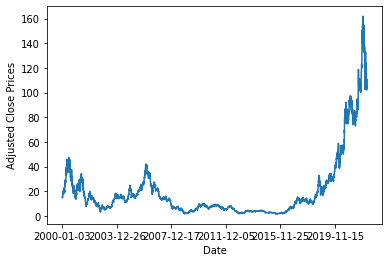

In [ ]:
AMD.set_index("Date", inplace = True)
AMD['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

#Date pre-processing


 Read the file and set the date as the index

In [ ]:
AMD = pd.read_csv("/content/drive/MyDrive/340W/AMD.csv")
AMD.set_index("Date", inplace = True)
AMD.dropna(inplace = True)

Feature selection

In [ ]:
x = AMD.iloc[:, 0:5].values
y = AMD.iloc[:, 4].values

 Divide into train and test datasets

In [ ]:
x.shape


(5585, 5)

In [ ]:
y.shape

(5585,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

Scaling the features



In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

Hyperparemater tuning

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)


[  8.03131819 116.61399284   3.05870591 ...  13.69531776  11.90733419
   3.78507164]
(1453,)


In [ ]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}


In [ ]:
predict.shape

(1453,)

statistical metrics and performance evaluation

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.036
Mean Squared Error: 0.048
Root Mean Squared Error: 0.2191
(R^2) Score: 0.9999
Train Score : 100.00% and Test Score : 99.99% using Random Tree Regressor.
Accuracy: 99.89 %.


future days from predicted values and plot

In [ ]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=AMD.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_AMD = pd.DataFrame(predictions[:252])
oneyear_AMD.to_csv("one-year-predictions.csv")
onemonth_AMD = pd.DataFrame(predictions[:21])
onemonth_AMD.to_csv("one-month-predictions.csv")
fivedays_AMD = pd.DataFrame(predictions[:5])
fivedays_AMD.to_csv("five-days-predictions.csv")

one-year prediction

Buy price and date
     Unnamed: 0  Predictions
126  2022-07-18     1.785588
Sell price and date
     Unnamed: 0  Predictions
242  2022-11-11   154.963963


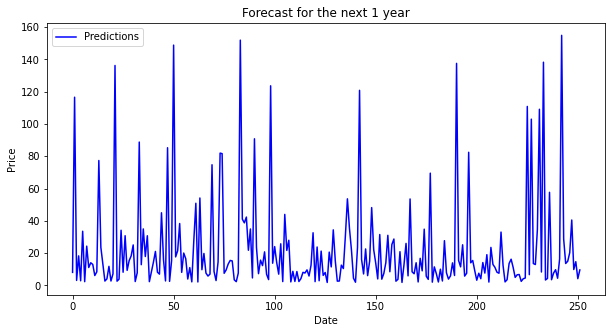

In [ ]:
oneyear_AMD_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_AMD_pred["Predictions"])
sell_price = max(oneyear_AMD_pred["Predictions"])
oneyear_buy = oneyear_AMD_pred.loc[oneyear_AMD_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_AMD_pred.loc[oneyear_AMD_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_AMD_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

one month prediction

Buy price and date
   Unnamed: 0  Predictions
6  2022-03-20     2.277241
Sell price and date
   Unnamed: 0  Predictions
1  2022-03-15   116.613993


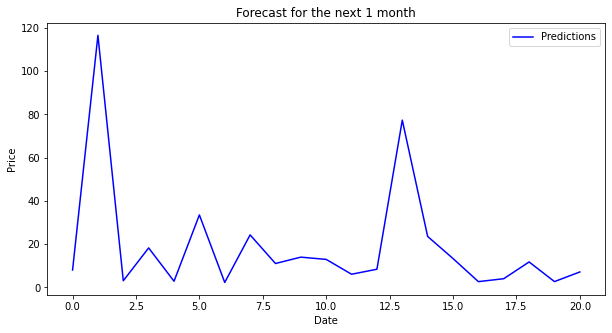

In [ ]:
onemonth_AMD_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_AMD_pred["Predictions"])
sell_price = max(onemonth_AMD_pred["Predictions"])
onemonth_buy = onemonth_AMD_pred.loc[onemonth_AMD_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_AMD_pred.loc[onemonth_AMD_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_AMD_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

five days prediction:

Buy price and date
   Unnamed: 0  Predictions
4  2022-03-18     2.829683
Sell price and date
   Unnamed: 0  Predictions
1  2022-03-15   116.613993


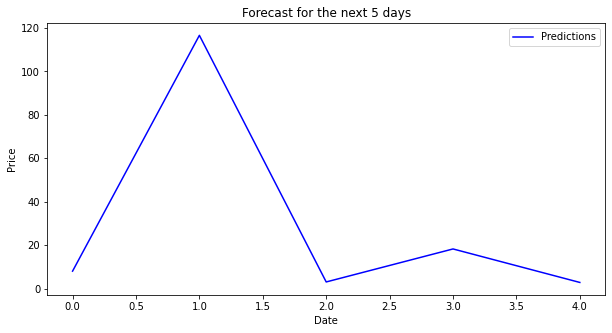

In [ ]:
fivedays_AMD_pred = pd.read_csv("five-days-predictions.csv")
buy_price = min(fivedays_AMD_pred["Predictions"])
sell_price = max(fivedays_AMD_pred["Predictions"])
fivedays_buy = fivedays_AMD_pred.loc[fivedays_AMD_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_AMD_pred.loc[fivedays_AMD_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_AMD_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

#INTC

import data



In [ ]:
INTC = pd.read_csv("/content/drive/MyDrive/340W/INTC.csv")
INTC.set_index("Date", inplace = True)
INTC.dropna(inplace = True)

visualize the data

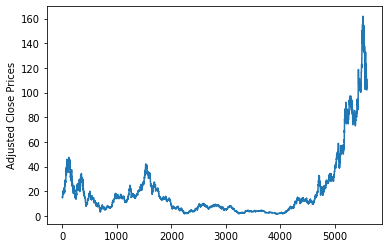

In [ ]:
INTC = pd.read_csv("/content/drive/MyDrive/340W/INTC.csv")
INTC.set_index('Date', inplace = True)
AMD['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

#Date pre-processing


In [ ]:
AMD = pd.read_csv("/content/drive/MyDrive/340W/AMD.csv")
AMD.set_index("Date", inplace = True)
AMD.dropna(inplace = True)

feature selection

In [ ]:
x = INTC.iloc[:, 0:5].values
y = INTC.iloc[:, 4].values

devide into train and test datasets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

scalling the features

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

hyperparemater tuning

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[11.44933287 54.39399998 27.91118251 ... 20.16606951 38.73564871
 11.40323246]
(1453,)


In [ ]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 8, 'bootstrap': True}


apply model to predict

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

In [ ]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=INTC.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_INTC = pd.DataFrame(predictions[:252])
oneyear_INTC.to_csv("one-year-predictions.csv")
onemonth_INTC = pd.DataFrame(predictions[:21])
onemonth_INTC.to_csv("one-month-predictions.csv")
fivedays_INTC = pd.DataFrame(predictions[:5])
fivedays_INTC.to_csv("five-days-predictions.csv")

one-year prediction

In [ ]:
oneyear_INTC_pred = pd.read_csv("one-year-predictions.csv")
oneyear_INTC_pred.set_index("Date", inplace=True)
buy_price = min(oneyear_INTC_pred["Predictions"])
sell_price = max(oneyear_INTC_pred["Predictions"])
oneyear_buy = oneyear_INTC_pred.loc[oneyear_INTC_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_INTC_pred.loc[oneyear_INTC_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_INTC_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

one-month prediction

In [ ]:
onemonth_INTC_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_INTC_pred["Predictions"])
sell_price = max(onemonth_INTC_pred["Predictions"])
onemonth_buy = onemonth_INTC_pred.loc[onemonth_INTC_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_INTC_pred.loc[onemonth_INTC_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_INTC_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

five-day prediction

In [ ]:
fivedays_INTC_pred = pd.read_csv("five-days-predictions.csv")
buy_price = min(fivedays_INTC_pred["Predictions"])
sell_price = max(fivedays_INTC_pred["Predictions"])
fivedays_buy = fivedays_INTC_pred.loc[fivedays_INTC_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_INTC_pred.loc[fivedays_INTC_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_INTC_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

#NVDA

import data

In [ ]:
NVDA = pd.read_csv("/content/drive/MyDrive/340W/NVDA.csv")
INTC.set_index("Date", inplace = True)
INTC.dropna(inplace = True)

visualize data

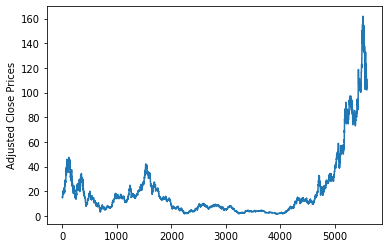

In [ ]:
NVDA = pd.read_csv("/content/drive/MyDrive/340W/NVDA.csv")
NVDA.set_index('Date', inplace = True)
AMD['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

data pre-processing

In [ ]:
NVDA = pd.read_csv("/content/drive/MyDrive/340W/NVDA.csv")
NVDA.set_index("Date", inplace = True)
NVDA.dropna(inplace = True)

In [ ]:
x = NVDA.iloc[:, 0:5].values
y = NVDA.iloc[:, 4].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[  1.04194665 222.99005049   5.32724371 ...   1.07515339  54.66891477
   2.49842843]
(1453,)


use model to predict

In [ ]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 1, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}


In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.0724
Mean Squared Error: 0.1403
Root Mean Squared Error: 0.3746
(R^2) Score: 0.9999
Train Score : 100.00% and Test Score : 99.99% using Random Tree Regressor.
Accuracy: 99.82 %.


In [ ]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=NVDA.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_NVDA = pd.DataFrame(predictions[:252])
oneyear_NVDA.to_csv("one-year-predictions.csv")
onemonth_NVDA = pd.DataFrame(predictions[:21])
onemonth_NVDA.to_csv("one-month-predictions.csv")
fivedays_NVDA = pd.DataFrame(predictions[:5])
fivedays_NVDA.to_csv("five-days-predictions.csv")

Buy price and date
     Unnamed: 0  Predictions
96   2022-06-18     0.756454
219  2022-10-19     0.756454
Sell price and date
     Unnamed: 0  Predictions
242  2022-11-11   316.765336


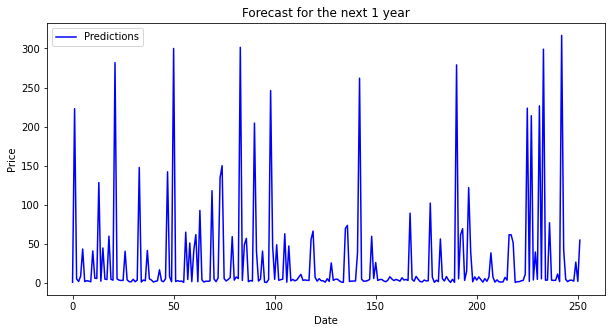

In [ ]:
oneyear_NVDA_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_NVDA_pred["Predictions"])
sell_price = max(oneyear_NVDA_pred["Predictions"])
oneyear_buy = oneyear_NVDA_pred.loc[oneyear_NVDA_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_NVDA_pred.loc[oneyear_NVDA_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_NVDA_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
   Unnamed: 0  Predictions
0  2022-03-14     1.041947
Sell price and date
   Unnamed: 0  Predictions
1  2022-03-15    222.99005


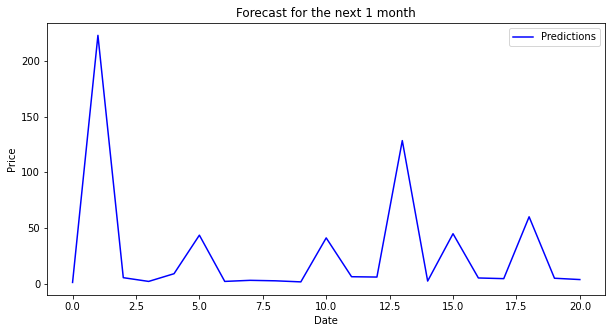

In [ ]:
onemonth_NVDA_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_NVDA_pred["Predictions"])
sell_price = max(onemonth_NVDA_pred["Predictions"])
onemonth_buy = onemonth_NVDA_pred.loc[onemonth_NVDA_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_NVDA_pred.loc[onemonth_NVDA_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_NVDA_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
   Unnamed: 0  Predictions
0  2022-03-14     1.041947
Sell price and date
   Unnamed: 0  Predictions
1  2022-03-15    222.99005


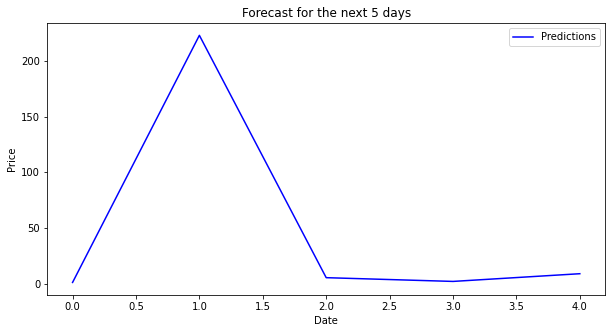

In [ ]:
fivedays_NVDA_pred = pd.read_csv("five-days-predictions.csv")
buy_price = min(fivedays_NVDA_pred["Predictions"])
sell_price = max(fivedays_NVDA_pred["Predictions"])
fivedays_buy = fivedays_NVDA_pred.loc[fivedays_NVDA_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_NVDA_pred.loc[fivedays_NVDA_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_NVDA_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()